In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance,KElbowVisualizer

In [2]:
%load_ext pycodestyle_magic

In [3]:
%flake8_on

In [4]:
md_df = pd.read_csv('md_df.csv')

x = md_df.values
features = md_df.columns

In [5]:
from sklearn import decomposition
from sklearn import preprocessing

pca = decomposition.PCA(n_components=2)
scaler = preprocessing.StandardScaler()
rscaler = preprocessing.RobustScaler()
mscaler = preprocessing.MinMaxScaler()

x_scale = rscaler.fit_transform(x)

pca.fit(x_scale)

PCA(n_components=2)

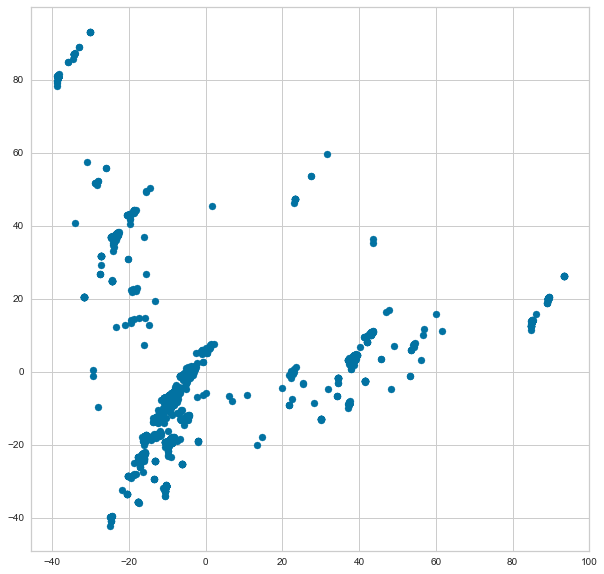

In [6]:
x_proj = pca.transform(x_scale)
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_proj[:, 0], x_proj[:, 1])
plt.show()

In [7]:
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

iso = Isomap()
mds = MDS()
tsne = TSNE()

x_proj2 = mds.fit_transform(x_scale)
x_proj3 = tsne.fit_transform(x_scale)
x_proj4 = iso.fit_transform(x_scale)

E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
E:\Data_Science\Anaconda\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
E:\Data_Science\Anaconda\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity st

In [8]:
from sklearn import cluster, metrics

Text(0.55, 0.4, 'Best silhouette : 0.33, Optimal Clus : 40')

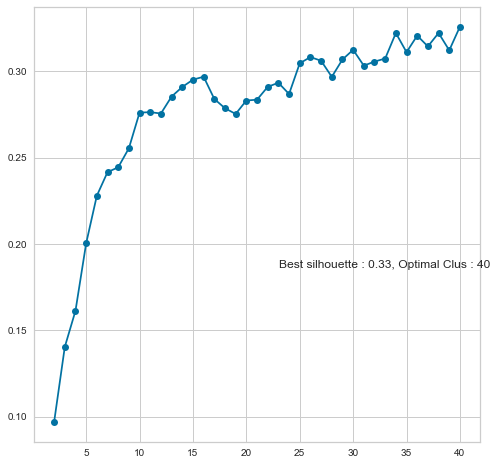

In [9]:
silhouette = []
for i in range(2, 41):
    clus = cluster.KMeans(n_clusters=i,
                          random_state=38
                          )
    clus.fit(x_scale)
    sil = metrics.silhouette_score(x_scale, clus.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = (silhouette.index(max_sil) + 2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(range(2, 41),
        silhouette,
        marker='o'
        )
plt.savefig('cluster_optimizer.png', bbox_inches='tight')
ax.text(0.55, 0.4, 'Best silhouette : {:.2f}, Optimal Clus : {}'
        .format(max_sil, index),
        transform=ax.transAxes
        )

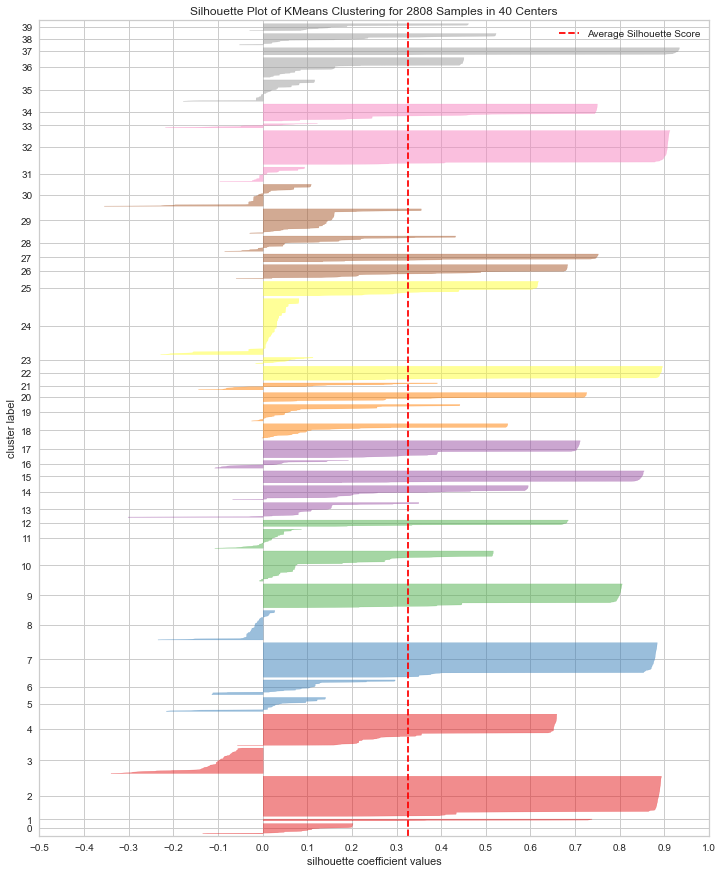

In [10]:
clus = cluster.KMeans(n_clusters=40,
                      random_state=38
                      )
clus.fit(x_scale)

fig, ax = plt.subplots(figsize=(12, 15))
visualizer = SilhouetteVisualizer(clus, ax=ax)
visualizer.fit(x_scale)
visualizer.finalize()  # Fit the data to the visualizer
plt.savefig('cluster_visualizer.png', bbox_inches='tight')
plt.show()

Text(0.55, 0.4, 'Best silhouette : 0.35, Optimal Eps : 4.0')

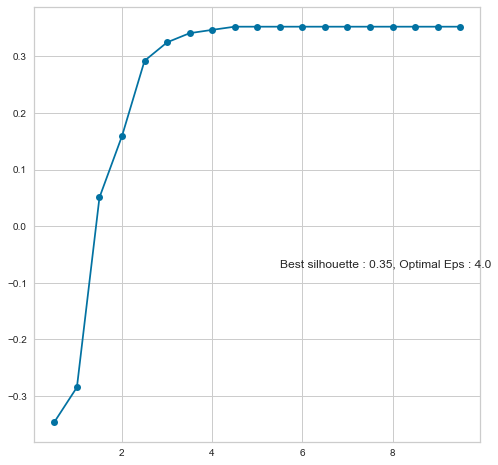

In [11]:
silhouette = []
eps_range = list(np.arange(0.5, 10, 0.5))
for i in eps_range:
    dbscan = cluster.DBSCAN(eps=i)
    dbscan.fit(x_scale)
    sil = metrics.silhouette_score(x_scale, dbscan.labels_)
    silhouette.append(sil)
max_sil = max(silhouette)
index = (silhouette.index(max_sil))
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(np.arange(0.5, 10, 0.5),
        silhouette,
        marker='o'
        )
plt.savefig('dbscan_optimizer.png', bbox_inches='tight')
ax.text(0.55, 0.4, 'Best silhouette : {:.2f}, Optimal Eps : {}'
        .format(max_sil,
                round(index/2, 2)),
        transform=ax.transAxes
        )

In [12]:
md_df['clus_label'] = clus.labels_
clus_sil = round(metrics.silhouette_score(x_scale, clus.labels_), 2)
md_df['dbscan_label'] = dbscan.labels_
dbscan_sil = round(metrics.silhouette_score(x_scale, dbscan.labels_), 2)
print('KMeans have found {} clusters with a silhouette score of : {}'
      .format(len(md_df['clus_label'].unique()),
              clus_sil)
      )
print('BDscan have found {} clusters with a silhouette score of : {}'
      .format(len(md_df['dbscan_label'].unique()),
              dbscan_sil)
      )

KMeans have found 40 clusters with a silhouette score of : 0.33
BDscan have found 97 clusters with a silhouette score of : 0.35


In [13]:
tsne3d = TSNE(n_components=3)
x_proj3d = tsne3d.fit_transform(x_scale)

E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


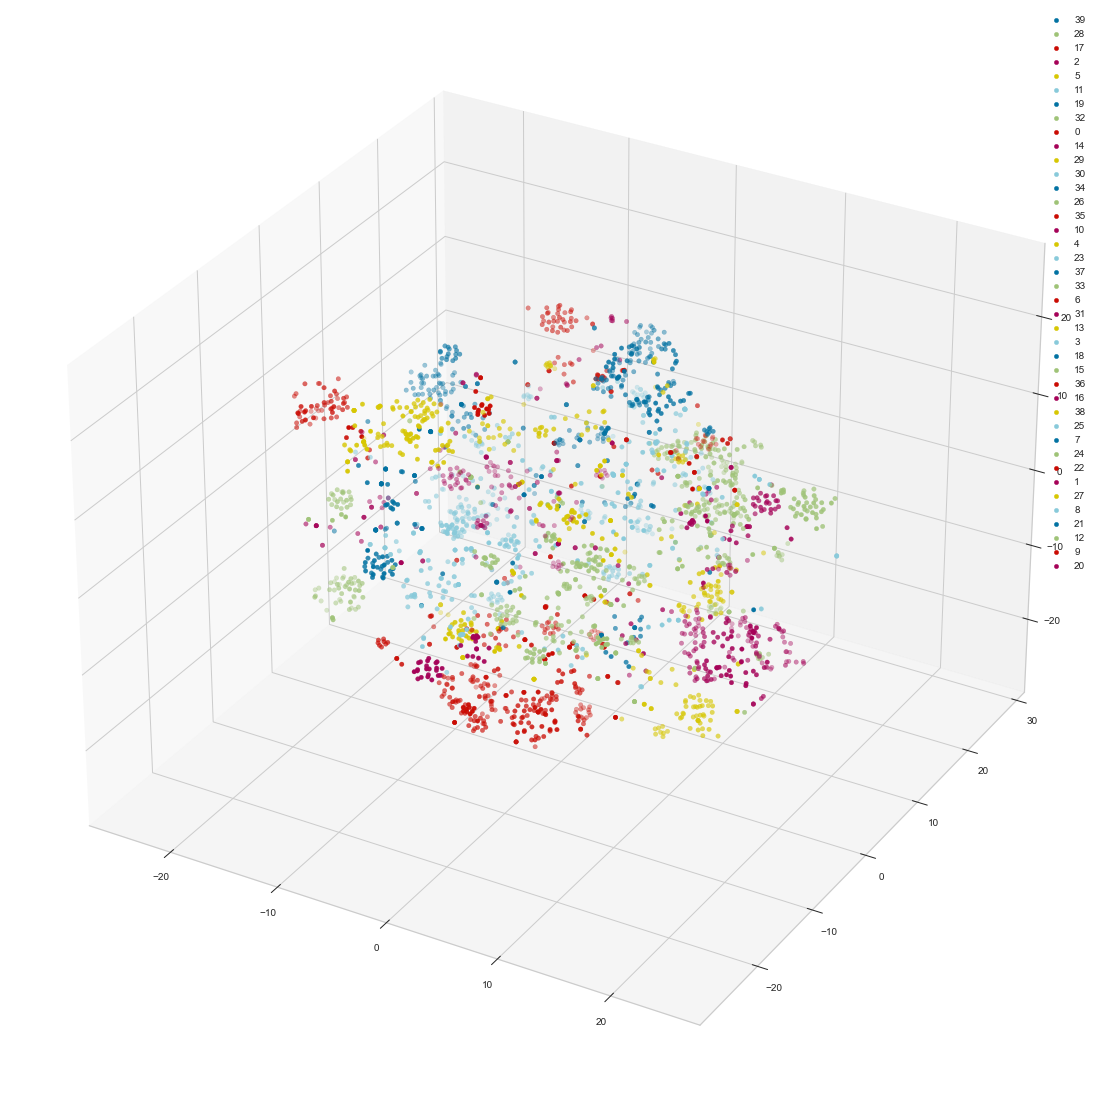

In [14]:
temp = pd.DataFrame(clus.labels_, columns=['label'])
temp = temp.join(pd.DataFrame(x_proj3d), lsuffix=index)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20, 20))
for i in temp['label'].unique():
    ax.scatter(temp[0].loc[temp['label'] == i],
               temp[1].loc[temp['label'] == i],
               temp[2].loc[temp['label'] == i],
               label=i
               )
plt.legend()
plt.savefig('cluster_3d.png', bbox_inches='tight')
plt.show()

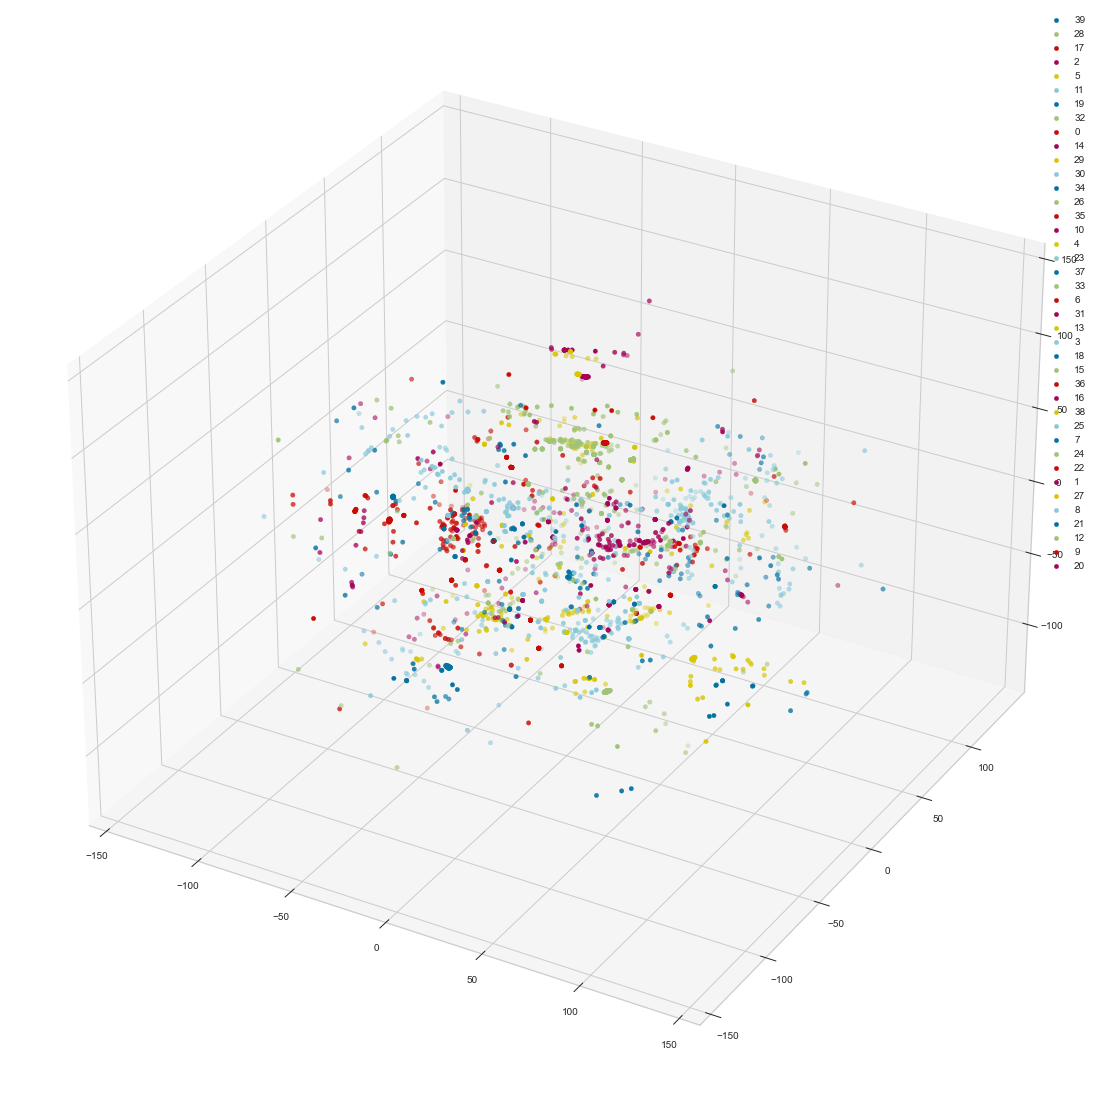

In [15]:
mds3d = MDS(n_components=3)
x_proj3d = mds3d.fit_transform(x_scale)
temp = pd.DataFrame(clus.labels_, columns=['label'])
temp = temp.join(pd.DataFrame(x_proj3d), lsuffix=index)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20, 20))
for i in temp['label'].unique():
    ax.scatter(temp[0].loc[temp['label'] == i],
               temp[1].loc[temp['label'] == i],
               temp[2].loc[temp['label'] == i],
               label=i
               )
plt.legend()
plt.savefig('cluster_3d_mds.png', bbox_inches='tight')
plt.show()

E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
E:\Data_Science\Anaconda\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
E:\Data_Science\Anaconda\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
E:\Data_Science\Anaconda\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
E:\Data_Science\Anaconda\lib\s

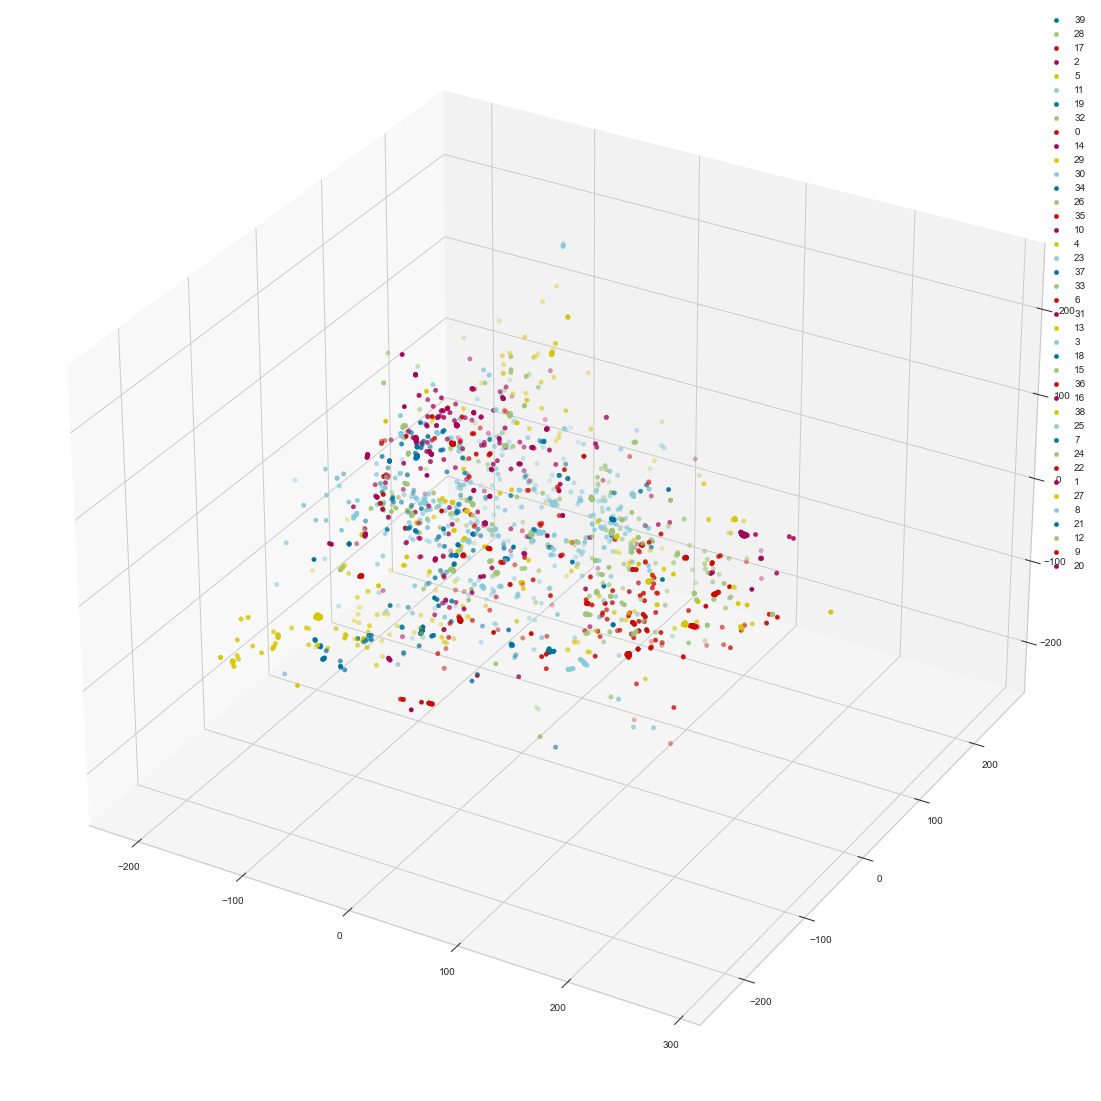

In [16]:
iso3d = Isomap(n_components=3)
x_proj3d = iso3d.fit_transform(x_scale)
temp = pd.DataFrame(clus.labels_, columns=['label'])
temp = temp.join(pd.DataFrame(x_proj3d), lsuffix=index)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20, 20))
for i in temp['label'].unique():
    ax.scatter(temp[0].loc[temp['label'] == i],
               temp[1].loc[temp['label'] == i],
               temp[2].loc[temp['label'] == i],
               label=i
               )
plt.legend()
plt.savefig('cluster_3d_iso.png', bbox_inches='tight')
plt.show()

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
df = pd.read_csv('md_df.csv')

In [19]:
from sklearn import preprocessing

x = df.values
rscaler = preprocessing.RobustScaler()
x_scale = rscaler.fit_transform(x)

In [20]:
n_inputs = x_scale.shape[1]

inputs = keras.Input(shape=(n_inputs,))
hidden1e = layers.Dense(int(n_inputs/2), activation='relu')(inputs)
hidden2e = layers.Dense(int(n_inputs/4), activation='relu')(hidden1e)
hidden3e = layers.Dense(int(n_inputs/8), activation='relu')(hidden2e)
code = layers.Dense(3, activation='relu')(hidden3e)
hidden3d = layers.Dense(int(n_inputs/8), activation='relu')(code)
hidden2d = layers.Dense(int(n_inputs/4), activation='relu')(hidden3d)
hidden1d = layers.Dense(int(n_inputs/2), activation='relu')(hidden2d)
outputs = layers.Dense(n_inputs, activation='relu')(hidden1d)

autoencoder = keras.Model(inputs=inputs, outputs=outputs, name="autoencoder")

autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(x_scale, x_scale, epochs=100, batch_size=4, verbose=0)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 dense (Dense)               (None, 75)                11325     
                                                                 
 dense_1 (Dense)             (None, 37)                2812      
                                                                 
 dense_2 (Dense)             (None, 18)                684       
                                                                 
 dense_3 (Dense)             (None, 3)                 57        
                                                                 
 dense_4 (Dense)             (None, 18)                72        
                                                                 
 dense_5 (Dense)             (None, 37)                

17:80: E501 line too long (80 > 79 characters)


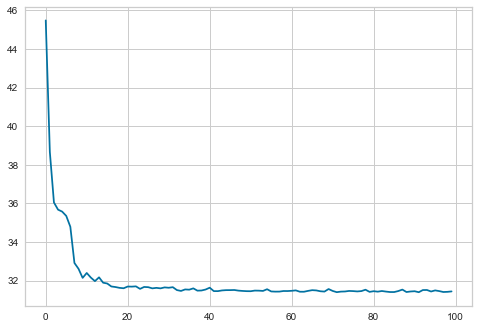

In [21]:
plt.plot(history.history['loss'], label='train')

In [22]:
encoder = keras.Model(inputs=inputs, outputs=code)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 dense (Dense)               (None, 75)                11325     
                                                                 
 dense_1 (Dense)             (None, 37)                2812      
                                                                 
 dense_2 (Dense)             (None, 18)                684       
                                                                 
 dense_3 (Dense)             (None, 3)                 57        
                                                                 
Total params: 14,878
Trainable params: 14,878
Non-trainable params: 0
_________________________________________________________________


88/88 [==============================] - 0s 843us/step


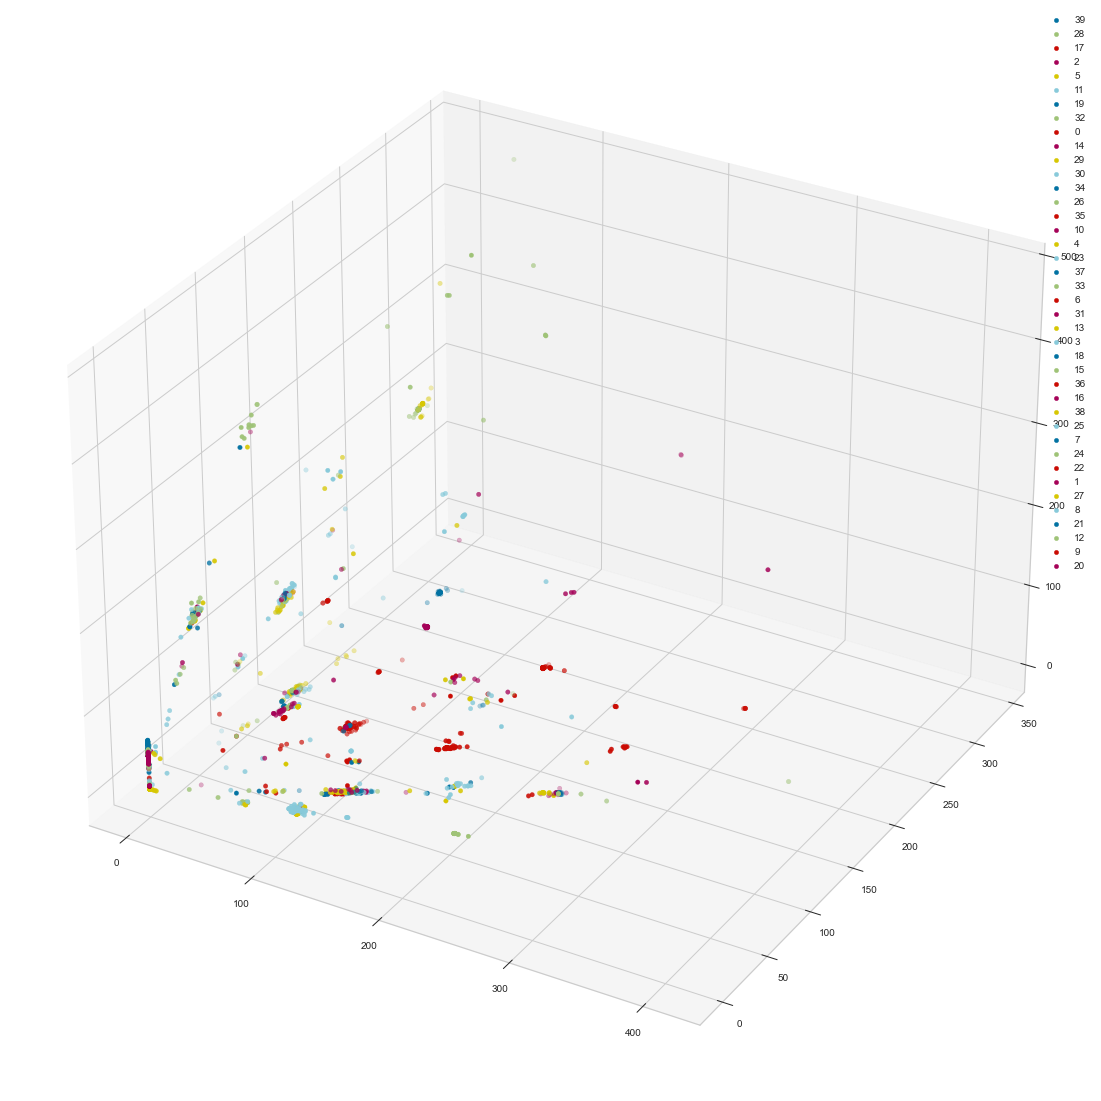

In [23]:
x_proj3d = encoder.predict(x_scale)
clus = cluster.KMeans(n_clusters=40, random_state=38)
clus.fit(x_scale)

temp = pd.DataFrame(clus.labels_, columns=['label'])
temp = temp.join(pd.DataFrame(x_proj3d))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20, 20))
for i in temp['label'].unique():
    ax.scatter(temp[0].loc[temp['label'] == i],
               temp[1].loc[temp['label'] == i],
               temp[2].loc[temp['label'] == i],
               label=i
               )
plt.legend()
plt.savefig('cluster_3d_ae.png', bbox_inches='tight')
plt.show()

In [24]:
md_df.describe()

,n_order,payment_mean,payment_std,"(6.621, 110.336]","(110.336, 209.111]","(209.111, 307.887]","(307.887, 406.662]","(406.662, 505.438]","(505.438, 604.214]","(604.214, 702.989]",...,"{'utilidades_domesticas', 'market_place'}","{'utilidades_domesticas', 'moveis_cozinha_area_de_servico_jantar_e_jardim'}","{'utilidades_domesticas', 'moveis_decoracao'}",{'utilidades_domesticas'},rev_mean,rev_std,days_since_last_order,age,clus_label,dbscan_label
count,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,...,2808.000000,2808.00000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000
mean,2.111467,147.191666,65.919883,55.025734,27.005345,9.471300,3.699345,1.746189,0.795335,0.534188,...,0.035613,0.01187,0.053419,5.467325,4.161333,0.493856,269.561254,357.469729,18.209402,15.779915
std,0.494397,152.453940,112.698087,40.074716,33.885965,22.453404,14.417198,9.503202,6.520163,5.637131,...,1.334164,0.62898,1.633719,18.047675,1.104741,0.819745,144.534403,146.738439,11.490999,24.900872
min,2.000000,15.620000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,44.000000,54.000000,0.000000,-1.000000
25%,2.000000,71.478750,8.987327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,3.500000,0.000000,153.750000,241.000000,8.000000,-1.000000
50%,2.000000,110.155000,32.682475,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,4.500000,0.000000,248.500000,352.500000,18.000000,1.000000
75%,2.000000,172.345000,76.314499,100.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,5.000000,0.707107,369.000000,475.000000,29.000000,24.000000
max,15.000000,3785.815000,1646.887049,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,50.000000,33.33000,50.000000,100.000000,5.000000,2.828427,740.000000,744.000000,39.000000,95.000000


In [25]:
n_order_m = md_df.describe().iloc[1, 0]
payment_m = md_df.describe().iloc[1, 1]
rev_m_m = md_df.describe().iloc[1, -6]
age_m = md_df.describe().iloc[1, -3]

In [26]:
# build the explanatory df
expl_df = pd.DataFrame()
# first the frequence of the clusters
expl_df['freq'] = md_df.groupby('clus_label').n_order.count()
expl_df['freq'] = round((expl_df['freq']/md_df.shape[0])*100, 2)
# the mean ,ratio and max of the number of order
expl_df['n_order_mean'] = md_df.groupby('clus_label').n_order.agg('mean')
expl_df['n_order_mean'] = round(expl_df['n_order_mean'], 2)
expl_df['n_order_ratio'] = round(expl_df['n_order_mean']/n_order_m, 2)
expl_df['n_order_max'] = md_df.groupby('clus_label').n_order.agg('max')
# the mean and the ratio of the mean of payment
expl_df['payment_m_m'] = md_df.groupby('clus_label').payment_mean.agg('mean')
expl_df['payment_m_m'] = round(expl_df['payment_m_m'], 2)
expl_df['payment_m_r'] = round(expl_df['payment_m_m']/payment_m, 2)
# the mean and ratio of the mean of review score
expl_df['rev_m_m'] = md_df.groupby('clus_label').rev_mean.agg('mean')
expl_df['rev_m_m'] = round(expl_df['rev_m_m'], 2)
expl_df['rev_ratio'] = round(expl_df['rev_m_m']/rev_m_m, 2)
# the mean and ratio of the age of each cluster
expl_df['age_m_m'] = md_df.groupby('clus_label').age.agg('mean')
expl_df['age_m_m'] = round(expl_df['age_m_m'], 2)
expl_df['age_ratio'] = round(expl_df['age_m_m']/age_m, 2)
# the top2 payment bucket for each cluster
temp = pd.DataFrame(md_df.groupby('clus_label').mean())
temp = temp.iloc[:, 3:18]
temp2 = temp.T

top1 = []
top2 = []
for i in range(temp2.shape[1]):
    val = list(round(temp2.iloc[:, i].nlargest(2), 2))
    cat = list(temp2.iloc[:, i].nlargest(2).index)
    cat_top2 = dict(zip(cat, val))
    cat_list = []
    for y in cat_top2:
        cat_list.append(str(y)
                        + ' : '
                        + str(cat_top2[y])
                        )
    top1.append(cat_list[0])
    top2.append(cat_list[1])

expl_df = expl_df.join(pd.DataFrame({'top1_pay': top1}))
# the top2 categories for each cluster
temp = pd.DataFrame(md_df.groupby('clus_label').mean())
temp = temp.iloc[:, 24: -5]
temp2 = temp.T

top1 = []
top2 = []
for i in range(temp2.shape[1]):
    val = list(round(temp2.iloc[:, i].nlargest(2), 2))
    cat = list(temp2.iloc[:, i].nlargest(2).index)
    cat_top2 = dict(zip(cat, val))
    cat_list = []
    for y in cat_top2:
        cat_list.append(str(y)
                        + ':'
                        + str(cat_top2[y])
                        )
    top1.append(cat_list[0])
    top2.append(cat_list[1])

expl_df = expl_df.join(pd.DataFrame({'top1_cat': top1,
                                     'top2_cat': top2}
                                    )
                       )

expl_df

,freq,n_order_mean,n_order_ratio,n_order_max,payment_m_m,payment_m_r,rev_m_m,rev_ratio,age_m_m,age_ratio,top1_pay,top1_cat,top2_cat
clus_label,,,,,,,,,,,,,
0,1.46,2.20,1.04,5,135.48,0.92,4.23,1.02,355.37,0.99,"(6.621, 110.336] : 50.65",{'beleza_saude'}:50.89,{'esporte_lazer'}:22.03
1,0.28,2.50,1.18,4,91.21,0.62,4.22,1.01,360.50,1.01,"(6.621, 110.336] : 68.75",{'esporte_lazer'}:50.0,{'telefonia'}:42.71
2,5.66,2.10,0.99,7,115.27,0.78,3.92,0.94,366.02,1.02,"(6.621, 110.336] : 65.77",{'cama_mesa_banho'}:100.0,{'agro_industria_e_comercio'}:0.0
3,3.60,2.33,1.10,6,205.02,1.39,4.41,1.06,325.93,0.91,"(6.621, 110.336] : 51.6",{'bebidas'}:6.02,{'livros_interesse_geral'}:5.94
4,4.42,2.08,0.99,4,170.63,1.16,3.99,0.96,324.12,0.91,"(6.621, 110.336] : 56.32",{'informatica_acessorios'}:90.86,{'malas_acessorios'}:1.21
5,1.99,2.18,1.03,3,140.30,0.95,4.19,1.01,365.82,1.02,"(6.621, 110.336] : 56.85",{'beleza_saude'}:50.6,{'informatica_acessorios'}:7.74
6,2.10,2.03,0.96,3,215.79,1.47,3.99,0.96,380.95,1.07,"(209.111, 307.887] : 61.3",{'moveis_decoracao'}:62.43,{'beleza_saude'}:4.24
7,4.88,2.05,0.97,4,114.74,0.78,4.24,1.02,348.12,0.97,"(6.621, 110.336] : 65.88",{'beleza_saude'}:99.64,"{'beleza_saude', 'malas_acessorios'}:0.18"
8,4.17,2.10,0.99,4,169.12,1.15,4.38,1.05,359.09,1.00,"(6.621, 110.336] : 56.77",{'utilidades_domesticas'}:49.86,{'esporte_lazer'}:4.34


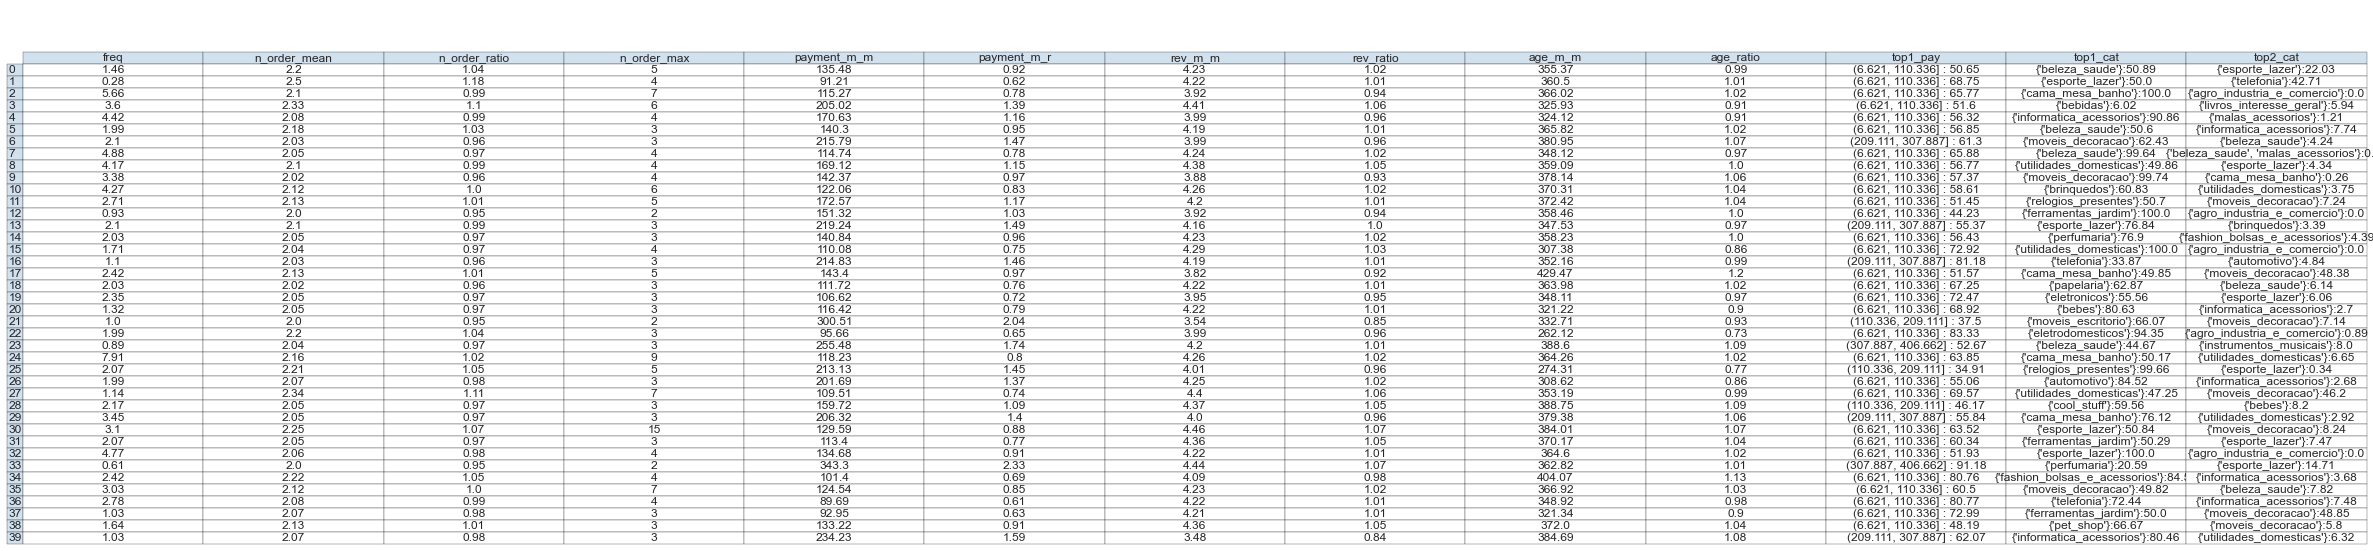

In [27]:
colcol = plt.cm.BuPu(np.full(len(expl_df.columns), 0.18))
rowcol = plt.cm.BuPu(np.full(len(expl_df.index), 0.18))
fig, ax = plt.subplots(figsize=(42, 25))
plt.subplots_adjust(top=0.15)

ax.axis('off')

table = ax.table(cellText=expl_df.values,
                 colLabels=expl_df.columns,
                 rowLabels=expl_df.index,
                 colColours=colcol,
                 rowColours=rowcol,
                 cellLoc='center',
                 )
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.savefig('table_expl_df.png', bbox_inches='tight', dpi=300)
plt.show()

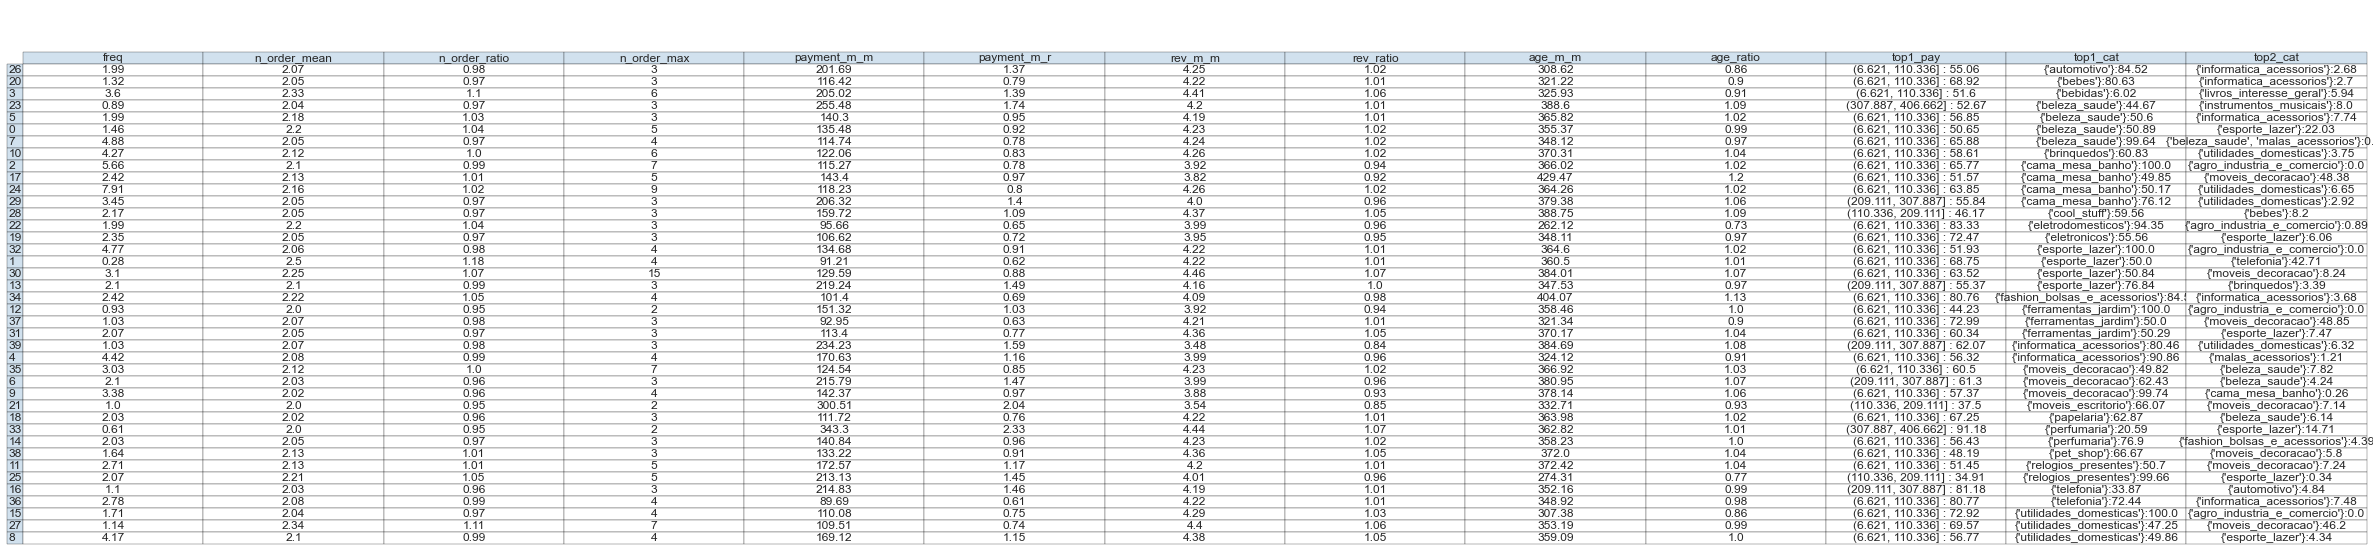

In [28]:
colcol = plt.cm.BuPu(np.full(len(expl_df.columns), 0.18))
rowcol = plt.cm.BuPu(np.full(len(expl_df.index), 0.18))
temp = expl_df.sort_values(by='top1_cat')
fig, ax = plt.subplots(figsize=(42, 25))
plt.subplots_adjust(top=0.15)

ax.axis('off')

table = ax.table(cellText=temp.values,
                 colLabels=temp.columns,
                 rowLabels=temp.index,
                 colColours=colcol,
                 rowColours=rowcol,
                 cellLoc='center',
                 )
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.savefig('table_expl_df_sort.png', bbox_inches='tight', dpi=300)
plt.show()